In [5]:
import numpy as np

def mean_square_error(y_pred,y_true):
	y_pred = np.array(y_pred)
	y_true = np.array(y_true)
	return (np.sum((y_pred-y_true)**2))/y_true.size

In [6]:
# from sklearn.metrics import mean_squared_error

In [15]:
t = np.random.random(10)
mean_square_error(t,t), t

(0.0,
 array([0.75123704, 0.39073753, 0.92439827, 0.4390765 , 0.36001036,
        0.24030703, 0.02158595, 0.22214578, 0.44265634, 0.79786237]))

In [16]:
y1 = np.round(t,3)
y2 = np.round(t,5)

mean_square_error(y1,t),  mean_square_error(y2,t)

(7.136579932512297e-08, 9.223040818717725e-12)

## CEE

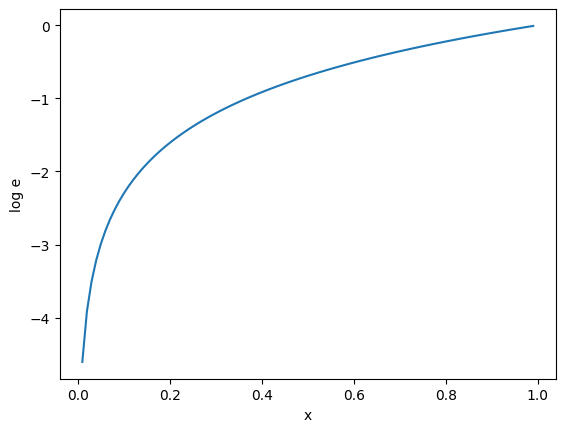

In [13]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0.01,1.0,0.01)
y = np.log(x)

plt.xlabel('x')
plt.ylabel('log e')
plt.plot(x,y)

plt.show()

In [19]:
def cross_entropy_error(y_pred, y_true):
    delta = 0.0000001
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return -np.sum(y_true*np.log(y_pred+delta))

In [31]:
t = [0,0,1,0,0,0,0,0,0,0]
y1 = np.random.random(10)
y1 = y1/np.sum(y1)
y2 = np.random.random(10)
y2 = y2/np.sum(y2)
y1, y2

(array([0.16688945, 0.14363132, 0.03154606, 0.15386288, 0.10449276,
        0.0658097 , 0.13598257, 0.00890545, 0.07229548, 0.11658432]),
 array([0.02275757, 0.13538388, 0.00573939, 0.01648313, 0.13029108,
        0.17515746, 0.04138472, 0.20328703, 0.15697883, 0.11253691]))

In [32]:
cross_entropy_error(y1,t), cross_entropy_error(y2,t) 

(0.44935685811838183, 0.6237331643123447)

## BCE

In [30]:
def binary_entropy_error(y_pred, y_true):
    delta = 0.0000001
    y_pred = np.array(y_pred)
    y_true = np.array(y_true)
    return -np.mean(y_true*np.log(y_pred+delta)+(1-y_true)*np.log(1-y_pred+delta))

In [38]:
t = 0
y1 = 1
y2 = 0
binary_entropy_error(y1,t), binary_entropy_error(y2,t)

(16.11809565095832, -9.999999505838704e-08)

 미니배치를 코드로 구현해본다
- 실행은 하지 않고, 관련 함수를 정의하기까지만 한다
- pytest 폴더 안에 있는 dataset 폴더 전체를 
  현재 작성하고 있는 파일과 같은 경로에 둔다 (모듈 불러오기)
- 예를 들어, Jupyter를 사용하며, C:/Users/로컬계정/ 안에서 작성하고 있다면,
   같은 경로에 dataset 폴더를 둔다.

In [39]:
import pandas as pd
import os

path = 'D:\\elice_python\\GAS_5\\pytest\\'

os.chdir(path)

In [40]:
from dataset.mnist import load_mnist

In [41]:
(x_train, t_train),(x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
x_train.shape, t_train.shape

((60000, 784), (60000, 10))

In [47]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [51]:
def cross_entropy_error(y,t):
    if y.ndim == i : # 데이터가 하나 들어올 경우 2차원으로 변경
        y = np.array(y)
        t = np.array(t)
        t = t.reshape(1,t.size)
        y = y.reshape(1,y.size)
        
    batch_size = y.shape[0]
    return -np.sum(t*np.log(y))/batch_size